In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import cv2
from PIL import Image
from sklearn.preprocessing import OneHotEncoder

In [ ]:
path = "/content/drive/MyDrive/Bird_Data_set/bids_ds/train_data/train_data"
in_size=(128,192,3)
in_shape=(192,128)
BATCH_SIZE=25
EPOCHS=15

In [ ]:
y_name=[]
x_image=[]
arr=[]
for file in os.listdir(path):
  y_name.append(file)
  arr=[]
  f_path=os.path.join(path,file)
  for img in os.listdir(f_path):
    img_arr=Image.open(os.path.join(f_path,img))
    img_arr=img_arr.resize(in_shape)
    arr.append(np.asarray(img_arr))
  x_image.append(arr)

In [ ]:
num_classes=len(y_name)

In [ ]:
ytr_labels=[]
xtr=[]
for i in range(len(y_name)):
  for j in range(len(x_image[i])):
    ytr_labels.append(y_name[i])
    xtr.append(x_image[i][j])

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
reshaped_labels = [[label] for label in ytr_labels]
ytr = onehot_encoder.fit_transform(reshaped_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
xtr=np.array(xtr)
ytr=np.array(ytr)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(128, 192, 3)


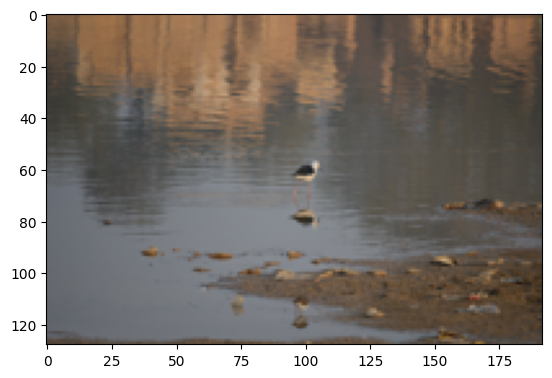

In [ ]:
n=1
print(ytr[n])
print(xtr[n].shape)
plt.imshow(xtr[n])

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=in_size))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 126, 190, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 95, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 61, 93, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 46, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 44, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 22, 128)     

In [ ]:
model.fit(xtr,ytr,epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/15
6/6 [==============================] - 11s 2s/step - loss: 163.1280 - accuracy: 0.0333
Epoch 2/15
6/6 [==============================] - 10s 1s/step - loss: 5.8198 - accuracy: 0.1733
Epoch 3/15
6/6 [==============================] - 11s 2s/step - loss: 2.2421 - accuracy: 0.3867
Epoch 4/15
6/6 [==============================] - 8s 1s/step - loss: 1.5966 - accuracy: 0.6400
Epoch 5/15
6/6 [==============================] - 10s 2s/step - loss: 1.1735 - accuracy: 0.6733
Epoch 6/15
6/6 [==============================] - 10s 2s/step - loss: 0.7477 - accuracy: 0.8067
Epoch 7/15
6/6 [==============================] - 8s 1s/step - loss: 0.7443 - accuracy: 0.8600
Epoch 8/15
6/6 [==============================] - 11s 2s/step - loss: 0.5103 - accuracy: 0.9067
Epoch 9/15
6/6 [==============================] - 11s 2s/step - loss: 0.4134 - accuracy: 0.8533
Epoch 10/15
6/6 [==============================] - 8s 1s/step - loss: 0.4721 - accuracy: 0.9200
Epoch 11/15
6/6 [=======================